In [27]:
import os
import sys
parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0, os.path.join(parentdir, "Scrapers"))
sys.path.insert(0, os.path.join(parentdir, "Analysis")) 
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import scrape_game_stats as game_scrape
import analysis

=============== Scraping NBA.com for game statistics ==============================

In [28]:
day_url = game_scrape.get_scores_url(10, 1, 2018)

https://www.nba.com/games?date=2018-01-10

In [29]:
print(day_url)

https://stats.nba.com/stats/scoreboardV2?DayOffset=0&LeagueID=00&gameDate=1%2F10%2F2018


In [30]:
response = game_scrape.get_response("scores", 10, 1, 2018)

In [31]:
response_data = response.json()

In [32]:
game_ids = game_scrape.data_to_game_ids(response_data)

In [33]:
print(game_ids)

['0021700603', '0021700604', '0021700605', '0021700606', '0021700607', '0021700608', '0021700609', '0021700610', '0021700611', '0021700612', '0021700613']


In [34]:
observation = game_scrape.get_observation(game_ids[0])

In [35]:
columns = ["game_id", "home_flag", "team_id", "abb", "wins", "loss",
           "wl%", "asts", "rebs", "orebs", "tovs", "fga", "fg%", "2pa",
           "2p%", "3pa","3p%","fta", "ft%", "pfs", "pts", "ref1",
           "ref2", "ref3", "net_score", "won",
          ]

In [36]:
df = pd.DataFrame(data=observation, columns=columns)
df.set_index(["game_id", "home_flag"], inplace=True)
df.sort_index(inplace=True)

In [37]:
df

team_id  abb  wins  loss    wl%  asts  rebs  orebs  \
game_id    home_flag                                                          
0021700603 0          1610612742  DAL    15    28  0.349    23    39      3   
           1          1610612766  CHA    15    24  0.385    16    43      4   

                      tovs  fga  ...    3p%  fta    ft%  pfs  pts  ref1  \
game_id    home_flag             ...                                      
0021700603 0             8   83  ...  0.417   28  0.786   22  115  1363   
           1            11   84  ...  0.385   30  0.500   22  111  1363   

                        ref2    ref3  net_score  won  
game_id    home_flag                                  
0021700603 0          101283  200832          4    1  
           1          101283  200832         -4    0  

[2 rows x 24 columns]

=============== Running Classification ==============================

In [38]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "Data/SuccessfulScrape")

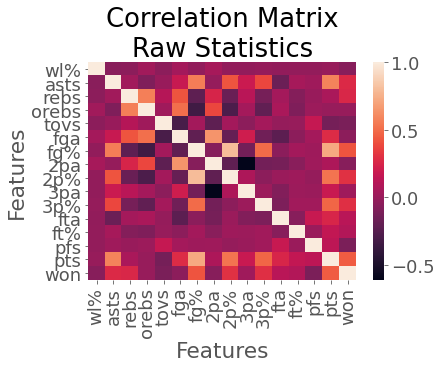

In [39]:
train, test, predict, control, finish = analysis.main(2018, data_path, True, "SVM")

In [40]:
print(f"  Train Score: {train*100:3.2f}")
print(f"   Test Score: {test*100:3.2f}")
print(f"Predict Score: {predict*100:3.2f}")
print(f"Control Score: {control*100:3.2f}")

  Train Score: 84.79
   Test Score: 89.76
Predict Score: 64.88
Control Score: 67.80


In [41]:
game_df = analysis.get_single_season_df(2018, data_path)

In [42]:
game_df.head()

,game_id,home_flag,team_id,abb,wins,loss,wl%,asts,rebs,orebs,...,3p%,fta,ft%,pfs,pts,ref1,ref2,ref3,net_score,won
0,21700318,0,1610612744,GSW,9,14,0.391,46,42,7,...,0.500,11,1.000,16,133,1162,2715,200832,21,1
1,21700318,1,1610612753,ORL,17,6,0.739,23,35,13,...,0.393,18,0.722,15,112,1162,2715,200832,-21,0
2,21700319,0,1610612754,IND,14,7,0.667,21,46,15,...,0.308,22,0.773,17,115,1146,2005,204058,-5,0
3,21700319,1,1610612761,TOR,12,11,0.522,29,47,12,...,0.313,21,0.667,18,120,1146,2005,204058,5,1
4,21700320,0,1610612765,DET,14,7,0.667,20,32,4,...,0.300,19,0.632,21,91,1179,2148,200834,-18,0


In [43]:
features = list(game_df.columns[6:-6])
regression = game_df.columns[-2]
label = game_df.columns[-1]
cols = features + [regression] + [label]

game_df = game_df.set_index(["game_id", "home_flag"])
game_df.head()

team_id  abb  wins  loss    wl%  asts  rebs  orebs  \
game_id  home_flag                                                          
21700318 0          1610612744  GSW     9    14  0.391    46    42      7   
         1          1610612753  ORL    17     6  0.739    23    35     13   
21700319 0          1610612754  IND    14     7  0.667    21    46     15   
         1          1610612761  TOR    12    11  0.522    29    47     12   
21700320 0          1610612765  DET    14     7  0.667    20    32      4   

                    tovs  fga  ...    3p%  fta    ft%  pfs  pts  ref1  ref2  \
game_id  home_flag             ...                                            
21700318 0            19   88  ...  0.500   11  1.000   16  133  1162  2715   
         1            14   96  ...  0.393   18  0.722   15  112  1162  2715   
21700319 0            10  102  ...  0.308   22  0.773   17  115  1146  2005   
         1            12   97  ...  0.313   21  0.667   18  120  1146  2005   
21700320 0            15   79  ...  0.300   19  0.632   21   91  1179  2148   

                      ref3  net_score  won  
game_id  home_flag                          
21700318 0          200832         21    1  
         1          200832        -21    0  
21700319 0          204058         -5    0  
         1          204058          5    1  
21700320 0          200834        -18    0  

[5 rows x 24 columns]

In [44]:
game_ids = np.array(game_df.index.levels[0])
train_df, val_df, test_df = analysis.split_dfs(game_df, game_ids, 0.75, 0, 0.25)
X_train, y_train = analysis.get_x_y(train_df, cols)
X_test, y_test = analysis.get_x_y(test_df, cols)

In [45]:
train_df.loc[:, cols].head()

wl%  asts  rebs  orebs  tovs  fga    fg%  2pa    2p%  \
game_id  home_flag                                                           
21700318 0          0.391    46    42      7    19   88  0.625   64  0.672   
         1          0.739    23    35     13    14   96  0.458   68  0.485   
21700320 0          0.667    20    32      4    15   79  0.443   49  0.531   
         1          0.545    28    49     16    11   89  0.483   68  0.529   
21700321 0          0.381    21    40     10    22   79  0.481   59  0.559   

                    3pa    3p%  fta    ft%  pfs  net_score  won  
game_id  home_flag                                               
21700318 0           24  0.500   11  1.000   16         21    1  
         1           28  0.393   18  0.722   15        -21    0  
21700320 0           30  0.300   19  0.632   21        -18    0  
         1           21  0.333   19  0.842   20         18    1  
21700321 0           20  0.250   21  0.905   24         -5    0

In [46]:
test_df.loc[:, cols].head()

wl%  asts  rebs  orebs  tovs  fga    fg%  2pa    2p%  \
game_id  home_flag                                                           
21700319 0          0.667    21    46     15    10  102  0.441   76  0.487   
         1          0.522    29    47     12    12   97  0.495   65  0.585   
21700322 0          0.143    29    43      8    12   85  0.529   67  0.582   
         1          0.318    30    38      8     8   90  0.467   54  0.538   
21700331 0          0.571    20    33      6    15   77  0.481   53  0.491   

                    3pa    3p%  fta    ft%  pfs  net_score  won  
game_id  home_flag                                               
21700319 0           26  0.308   22  0.773   17         -5    0  
         1           32  0.313   21  0.667   18          5    1  
21700322 0           18  0.333   14  0.786   15          1    1  
         1           36  0.361   13  0.692   16         -1    0  
21700331 0           24  0.458   21  0.905   28         -5    0

In [47]:
team_df = analysis.get_team_df(data_path)
team_df_year = team_df.loc[team_df["season"] == "2017-18"]
team_df_year.set_index("team_id", inplace=True)
team_df_year = team_df_year.loc[:, features]

In [48]:
team_df_year.head()

,wl%,asts,rebs,orebs,tovs,fga,fg%,2pa,2p%,3pa,3p%,fta,ft%,pfs
team_id,,,,,,,,,,,,,,
1610612737,0.293,23,41,9,15,85,0.446,54,0.495,31,0.360,20,0.785,19
1610612738,0.671,22,44,9,14,85,0.450,55,0.490,30,0.377,20,0.771,19
1610612739,0.610,23,42,8,13,84,0.476,52,0.540,32,0.372,23,0.779,18
1610612740,0.585,26,44,8,14,88,0.483,60,0.539,28,0.362,20,0.772,19
1610612741,0.329,23,44,9,14,88,0.435,57,0.479,31,0.355,19,0.759,19


In [49]:
X_predict, y_predict = analysis.get_predict_x_y(test_df, team_df_year, features)

In [50]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(X_predict))

(618, 13)
(205, 13)
(205, 13)


In [51]:
clf =  SVC(kernel="rbf", gamma="scale")
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
predict_score = clf.score(X_predict, y_predict)
control_score = analysis.test_control_score(test_df, team_df_year)

In [52]:
print(f"  Train Score: {train_score*100:3.2f}")
print(f"   Test Score: {test_score*100:3.2f}")
print(f"Predict Score: {predict_score*100:3.2f}")
print(f"Control Score: {control_score*100:3.2f}")

  Train Score: 84.79
   Test Score: 89.76
Predict Score: 64.88
Control Score: 67.80
